# Вариант 11

## Интерполяция

Построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки ${X_i, Y_i}$ и вычислить значение погрешности интерполяции в точке $X^* = -0.5 $ для функции 
$y = arcctg(x)$

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import math
from prettytable import PrettyTable
from sympy import symbols
np.set_printoptions(precision=3, suppress=True)

In [248]:
X1 = np.array([-3, -1, 1, 3])
X2 = np.array([-3, 0, 1, 3])
x0 = -0.5 

def f(x):
    return math.pi / 2 - math.atan(x)

Y1 = np.array(list(map(f, X1)))
Y2 = np.array(list(map(f, X2)))
Y1, Y2

(array([2.82 , 2.356, 0.785, 0.322]), array([2.82 , 1.571, 0.785, 0.322]))

In [249]:
def lagrange_interpolation(points):
    def L(i, x):
        xi, yi = points[i]
        numerator, denominator = 1, 1
        for j, (xj, yj) in enumerate(points):
            if i != j:
                numerator *= x - xj
                denominator *= xi - xj
        return yi * numerator / denominator

    def p(x):
        return sum(L(i, x) for i in range(len(points)))

    return p

def newton_interpolation(points):
    n = len(points)
    x = [point[0] for point in points]
    y = [point[1] for point in points]
    table = [y]
    for j in range(1, n):
        row = []
        for i in range(n - j):
            row.append((table[j - 1][i + 1] - table[j - 1][i]) / (x[i + j] - x[i]))
        table.append(row)

    def p(t):
        result = table[0][0]
        product = 1
        for j in range(1, n):
            product *= (t - x[j - 1])
            result += table[j][0] * product
        return result

    return p

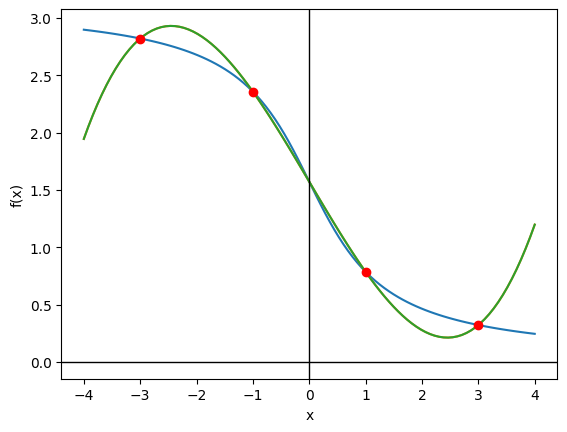

Погрешность многочлена Лагранжа = 0.05364932858654936
Погрешность многочлена Ньютона = 0.05364932858654892


In [250]:
def plot_on_interval(functions, points, l, r):
    X = np.linspace(l, r, 100)

    fig, ax = plt.subplots()

    for f in functions:
        Y = np.array(list(map(f, X)))
        plt.plot(X, Y)
    for point in points:
        plt.plot(point[0], point[1], marker='o', color='red')

    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.show()
    return ax

points = [(x, y) for x, y in zip(X1, Y1)]
lagrange_polynomial = lagrange_interpolation(points)
newton_polynomial = newton_interpolation(points)
plot_on_interval([f, lagrange_polynomial, newton_polynomial], points, -4, 4)
print("Погрешность многочлена Лагранжа = {0}\nПогрешность многочлена Ньютона = {1}".format(f(x0) - lagrange_polynomial(x0), f(x0) - newton_polynomial(x0)))

## Кубический сплайн

Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при  $x = x_0$ и $x = x_4$. 
Вычислить значение функции в точке $x = X^*$ .

In [251]:
def tridiagonal_matrix_algorithm(data):
	n = len(data)
	a = [0 for _ in range(n)]
	b, c, d = a.copy(), a.copy(), a.copy()
	for i in range(n):
		if i == 0:
			b[i] = data[i][0]
			c[i] = data[i][1]
			d[i] = data[i][2]
		elif i == n - 1:
			a[i] = data[i][0]
			b[i] = data[i][1]
			d[i] = data[i][2]
		else:
			a[i] = data[i][0]
			b[i] = data[i][1]
			c[i] = data[i][2]
			d[i] = data[i][3]

	P = [0.0 for _ in range(n)]
	Q = [0.0 for _ in range(n)]

	P[0], Q[0] = -c[0] / b[0], d[0] / b[0]
	for i in range(1, n):
		if i != n - 1:
			P[i] = -c[i] / (b[i] + a[i] * P[i - 1])
		Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])

	x = [0.0 for _ in range(n)]
	x[n - 1] = Q[n - 1]
	for i in range(n - 2, -1, -1):
		x[i] = P[i] * x[i + 1] + Q[i]

	return x

In [252]:
X_star = -0.5
X = [-3.0, -1.0, 1.0, 3.0, 5.0]
F = [2.8198, 2.3562, 0.78540, 0.32175, 0.19740]


def h(i):
	return X[i] - X[i - 1]


data = [
	[2 * (h(1) + h(2)), h(2), 3 * ((F[2] - F[1]) / h(2) - (F[1] - F[0]) / h(1))],
	[h(2), 2 * (h(2) + h(3)), h(3), 3 * ((F[3] - F[2]) / h(3) - (F[2] - F[1]) / h(2))],
	[h(3), 2 * (h(3) + h(4)), 3 * ((F[4] - F[3]) / h(4) - (F[3] - F[2]) / h(3))],
]

c_solved = tridiagonal_matrix_algorithm(data)
C = [-1.0] + [0.0] + c_solved
n = len(C) - 1

A = [-1.0] + F[:-1]
B = [-1.0] + [0.0 for i in range(1, n + 1)]
for i in range(1, n - 1):
	B[i] = (F[i] - F[i - 1]) / h(i) - 1 / 3 * h(i) * (C[i + 1] + 2 * C[i])
B[-1] = (F[n] - F[n - 1]) / h(n) - 2 / 3 * h(n) * C[n]
D = [-1.0] + [0.0 for i in range(1, n + 1)]
for i in range(1, n - 1):
	D[i] = (C[i + 1] - C[i]) / (3 * h(i))
D[-1] = -C[n] / (3 * h(n))

t = PrettyTable(['i', '[x_i; x_i+1]', 'a_i', 'b_i', 'c_i', 'd_i'])
for i in range(1, len(A)):
	t.add_row([i, f'[{X[i - 1]};{X[i]}]', A[i], B[i], C[i], D[i]])
print(t)

x = symbols('x')
for i in range(1, len(X) + 1):
	if X[i - 1] <= X_star <= X[i]:
		f = A[i] + B[i] * (x - X[i - 1]) + C[i] * (x - X[i - 1]) ** 2 + D[i] * (x - X[i - 1]) ** 3
		print(f'f({X_star}) = {f.subs(x, X_star)}')
		break


+---+--------------+---------+-----------------------+-----------------------+-----------------------+
| i | [x_i; x_i+1] |   a_i   |          b_i          |          c_i          |          d_i          |
+---+--------------+---------+-----------------------+-----------------------+-----------------------+
| 1 | [-3.0;-1.0]  |  2.8198 |  -0.04700267857142859 |          0.0          | -0.046199330357142854 |
| 2 |  [-1.0;1.0]  |  2.3562 |  -0.6013946428571428  |  -0.2771959821428571  |  0.09259665178571429  |
| 3 |  [1.0;3.0]   |  0.7854 |          0.0          |   0.2783839285714286  |          0.0          |
| 4 |  [3.0;5.0]   | 0.32175 | -0.054205357142857145 | -0.005977232142857136 | 0.0009962053571428559 |
+---+--------------+---------+-----------------------+-----------------------+-----------------------+
f(-0.5) = 1.99777826450893


## Метод наименьших квадратов

Для таблично заданной функции путем решения нормальной системы МНК найти приближающие многочлены 1-ой и 2-ой степени. Для каждого из приближающих многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой функции и приближающих многочленов.

In [253]:
def decompose_column(matrix, column):
    l_matrix_column = np.zeros((matrix.shape[0], 1))
    for row in range (column + 1, matrix.shape[0]):
        l_matrix_value = (matrix[row, column] / matrix[column, column])
        l_matrix_column[row, 0] = l_matrix_value
        matrix[row, :] += matrix[column, :] * (-l_matrix_value)
    return l_matrix_column

def decompose_column_lu(matrix, column):
    l_matrix_column = np.zeros(matrix.shape[0])
    for row in range (column + 1, matrix.shape[0]):
        l_matrix_value = (matrix[row, column] / matrix[column, column])
        l_matrix_column[row] = l_matrix_value
        matrix[row, column:] += matrix[column, column:] * (-l_matrix_value)
    matrix[:, column] += l_matrix_column

def get_matrix_with_non_zero_leading_element(matrix, column):
    for row in range (column, matrix.shape[0]):
        if matrix[row, column] != 0:
            matrix[[column, row]] = matrix[[row, column]]
            return column, row

def decompose_matrix_with_lu(matrix):
    b_column_to_swap = np.copy(matrix[:, matrix.shape[1] - 1].reshape(matrix.shape[0], 1))

    for column in range(0, matrix.shape[1] - 1):
        if matrix[column, column] == 0:
            row_swap_1, row_swap_2 = get_matrix_with_non_zero_leading_element(matrix, column)

            b_column_to_swap[[row_swap_1, row_swap_2]] = b_column_to_swap[[row_swap_2, row_swap_1]]

        decompose_column_lu(matrix, column)

    return matrix, b_column_to_swap

def solve_lz_equation(matrix):
    answer = []
    for row in range (0, matrix.shape[0]):
        sum_of_polynomial = 0
        if row != 0:
            for column in range(0, row):
                sum_of_polynomial += matrix[row, column] * answer[column]

        x = matrix[row, matrix.shape[1] - 1] - sum_of_polynomial
        answer.append(x)

    return np.array(answer)

def solve_ux_equation(matrix):
    answer = []
    for row in range (matrix.shape[0] - 1, -1, -1):
        sum_of_polynomial = 0
        if row < matrix.shape[0]:
            for column in range (matrix.shape[0] - 1, row, -1):
                sum_of_polynomial +=  matrix[row, column] * answer[matrix.shape[0] - column - 1]

        x = (matrix[row, matrix.shape[1] - 1] - sum_of_polynomial) / matrix[row, row]
        answer.append(x)

    answer.reverse()
    return np.array(answer)


def solve_with_lu(matrix):
    lu_matrix, swapped_b_column = decompose_matrix_with_lu(matrix)
    lu_matrix = np.delete(lu_matrix, -1, axis=1)
    lu_matrix = np.hstack((lu_matrix, swapped_b_column))
    z_answer = solve_lz_equation(lu_matrix)
    z_column = np.array(z_answer, dtype=float).reshape((matrix.shape[0], 1))
    lu_matrix = np.delete(lu_matrix, -1, axis=1)
    determinant = np.diagonal(lu_matrix).prod()
    lu_matrix = np.hstack((lu_matrix, z_column))
    return solve_ux_equation(lu_matrix)

def decompose_column_backwards(matrix, column):
    for row in range(column - 1, -1, -1):
        l_matrix_value = (matrix[row, column] / matrix[column, column])
        matrix[row, :] += matrix[column, :] * (-l_matrix_value)

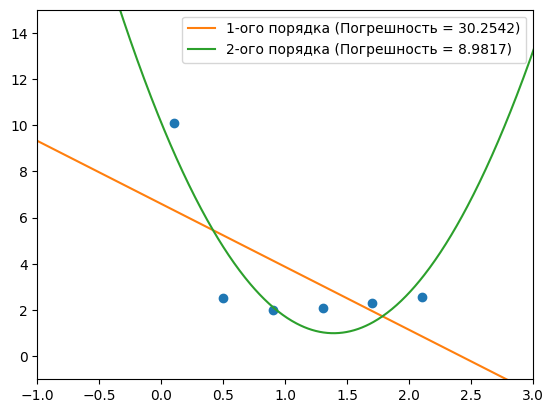

In [254]:
def least_squares(x, y, k):

    n = len(x)
    A = np.zeros((n, k+1))
    for i in range(n):
        for j in range(k+1):
            A[i, j] = x[i]**j
    ATA = np.dot(A.T, A)
    ATb = np.dot(A.T, np.atleast_2d(y).T)
    c = solve_with_lu(np.hstack([ATA, ATb]))
    def p(x_eval):
        return sum(c[j]*x_eval**j for j in range(k+1))
    return p

x = np.array([0.1, 0.5, 0.9, 1.3, 1.7, 2.1])
y = np.array([10.1, 2.5, 2.0111, 2.0692, 2.2882, 2.5762])

p1 = least_squares(x, y, 1)
y_p1 = p1(x)
loss_p1 = sum((y_p1 - y)**2)

p2 = least_squares(x, y, 2)
y_p2 = p2(x)
loss_p2 = sum((y_p2 - y)**2)

x_eval = np.linspace(-1.2, 5, 1000)
plt.plot(x, y, 'o')
plt.plot(x_eval, p1(x_eval), label=f'1-ого порядка (Погрешность = {loss_p1:.4f})')
plt.plot(x_eval, p2(x_eval), label=f'2-ого порядка (Погрешность = {loss_p2:.4f})')
plt.legend()
plt.xlim([-1, 3])
plt.ylim([-1, 15])
plt.show()


## Дифференцирование

Вычислить первую и вторую производную от таблично заданной функции в точке $x = X^*$.

In [255]:
def get_suitable_interval(x, x_test, y):
    assert len(x) == len(y)
    for interval in range(len(x)):
        if x[interval] <= x_test < x[interval + 1]:
            return interval


def df(x_test, x, y):
    i = get_suitable_interval(x, x_test, y)

    a1 = (y[i+1] - y[i]) / (x[i+1] - x[i])
    a2 = ((y[i+2] - y[i+1]) / (x[i+2] - x[i+1]) - a1) / (x[i+2] - x[i]) * (2*x_test - x[i] - x[i+1])
    return a1 + a2

def d2f(x_test, x, y):
    i = get_suitable_interval(x, x_test, y)

    num = (y[i+2] - y[i+1]) / (x[i+2] - x[i+1]) - (y[i+1] - y[i]) / (x[i+1] - x[i])
    return 2 * num / (x[i+2] - x[i])
x = [0.0, 0.5, 1.0, 1.5, 2.0]
y = [1.0, 1.3776, 1.5403, 1.5707, 1.5839]
x_test = 1.0

print('Первая производная')
print(f'df({x_test}) = {df(x_test, x, y)}')

print('Вторая производная')
print(f'd2f({x_test}) = {d2f(x_test, x, y)}')


Первая производная
df(1.0) = 0.07799999999999985
Вторая производная
d2f(1.0) = -0.06879999999999953


## Интегрирование

Вычислить определенный интеграл , методами прямоугольников, трапеций, Симпсона. Оценить погрешность вычислений, используя метод Рунге-Ромберга.

In [256]:
def integrate(f, X_0, X_k, h, type='rectangle'):
    n = int((X_k - X_0) / h)

    integral = 0
    if type == 'rectangle':
        for i in range(n):
            x_i = X_0 + i * h
            integral += np.abs(f(x_i + h / 2))

        integral *= h

    elif type == 'trapezoidal':
        for i in range(n):
            x_i = X_0 + i * h
            integral += np.abs(f(x_i) + f(x_i + h))

        integral *= h/2

    elif type == 'simpson':
        for i in range(n):
            x_i = X_0 + i * h
            integral += np.abs(f(x_i) + 4*f(x_i + h / 2) + f(x_i + h))

        integral *= h/6

    else:
        raise Exception(f'No such method: {type}')

    return integral

def runge_rombert_method(h1, h2, integral1, integral2, p):
    return integral1 + (integral1 - integral2) / ((h2 / h1)**p - 1)

def f(x):
    return 1 / (np.power(x, 3) + 64)

X0 = -2
Xk = 2

h1 = 1.0
h2 = 0.5

types = ['rectangle', 'trapezoidal', 'simpson']

for type in types:
    raw_integral_h1 = integrate(f, X0, Xk, h1, type)
    raw_integral_h2 = integrate(f, X0, Xk, h2, type)
    print(f'{type} с шагом = {h1}, {raw_integral_h1}')
    print(f'{type} с шагом = {h2}, {raw_integral_h2}')
    accurate = runge_rombert_method(h1, h2, raw_integral_h1, raw_integral_h2, 3)
    print(f'Рунге-Роберт {type} = {accurate}')


rectangle с шагом = 1.0, 0.0625872651271553
rectangle с шагом = 0.5, 0.06262558831675694
Рунге-Роберт rectangle = 0.0626310630581286
trapezoidal с шагом = 1.0, 0.06275564713064713
trapezoidal с шагом = 0.5, 0.06267145612890122
Рунге-Роберт trapezoidal = 0.06265942884293753
simpson с шагом = 1.0, 0.06264339246165258
simpson с шагом = 0.5, 0.0626408775874717
Рунге-Роберт simpson = 0.06264051831973157
